# 倒闭企业数据分析

**目标**：分析企业倒闭的原因以及特点，提取出有价值的信息供创业公司吸取经验和教训  
本项目主要分为四部分进行：1.理解数据集; 2.数据预处理；3.进行分析可视化；4.得出结论 

In [1]:
import os
from pyecharts.charts import Page
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.charts import Map
from pyecharts.charts import Bar
from pyecharts.charts import Calendar
from pyecharts.charts import WordCloud
from pyecharts.globals import ThemeType
from pyecharts.globals import SymbolType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
#加载数据集，了解数据集相关信息
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data = pd.read_csv('./com.csv')

## 1、 理解数据集

这是一份倒闭企业数据集，总计 6,272 条记录，包含 21 个字段

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bianh         6272 non-null   int64  
 1   com_name      6272 non-null   object 
 2   com_addr      6272 non-null   object 
 3   cat           6272 non-null   object 
 4   se_cat        6271 non-null   object 
 5   com_des       6271 non-null   object 
 6   born_data     6272 non-null   object 
 7   death_data    6272 non-null   object 
 8   live_days     6272 non-null   int64  
 9   financing     6272 non-null   object 
 10  total_money   805 non-null    float64
 11  death_reason  1419 non-null   object 
 12  invest_name   600 non-null    object 
 13  ceo_name      4839 non-null   object 
 14  ceo_des       4838 non-null   object 
 15  ceo_per_des   4839 non-null   object 
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [3]:
data.head()

,bianh,com_name,com_addr,cat,se_cat,com_des,born_data,death_data,live_days,financing,...,death_reason,invest_name,ceo_name,ceo_des,ceo_per_des,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,麦子金服,上海,金融,借贷,麦子金服是一家移动互联网金融服务集团，为个人和企业提供包括财富管理、股权投资、投融资咨询等综...,2015-03-01,2019-11-25,1730,B轮,...,政策监管 法律法规风险,海通开元&中缔资本,黄大容,董事长,黄大容，80后，经济学硕士，精通中英德三国语言。连续创业者，23岁创立第一家公司，25岁涉足...,NaN,NaN,NaN,NaN,NaN
1,1,拓道金服,浙江,金融,借贷,拓道金服是一家专注于汽车抵押贷款这一细分市场的P2P互联网金融公司。拓道金服通过互联网民间的...,2013-11-01,2019-11-24,2214,A轮,...,政策监管 法律法规风险,蓝山中国资本&帮实资本&宏桥资本,张罗军,创始人,杭州拓道科技有限公司执行董事兼总经理，重庆邮电学院计算机专业，创立杭州仁润科技有限公司，具有...,NaN,NaN,NaN,NaN,NaN
2,1,云柏科技,广东,医疗健康,医疗器械及硬件,云柏科技是一家智能健康检测腕表研发商，专注于智能可穿戴设备领域。主要产品包括可穿戴式多功能云...,2014-09-01,2019-11-01,1887,尚未获投,...,行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,迷你生鲜,福建,电子商务,生鲜食品,迷你生鲜是一家会员制水果生鲜电商网站，平台产品由基地直供，采购深入全国及东南亚各地区，减少中...,2017-11-01,2019-10-29,727,尚未获投,...,现金流断裂 行业竞争,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,一生健康,北京,医疗健康,寻医诊疗,微爱康一款基于移动互联网的癌症患者互助型垂直社区产品，通过在线社会化问答和类轻博客交流模式，...,2015-01-01,2019-10-17,1750,尚未获投,...,政策监管 法律法规风险,NaN,张耀斌,CEO,张耀斌，为一生（北京）健康科技有限公司的创始人。,NaN,NaN,NaN,NaN,NaN


这个 DataFrame 共有 6272 行和 21 列数据。其中：

- `bianh` 是整数类型，表示公司编号。
- `com_name` 是对象类型，表示公司名称。
- `com_addr` 是对象类型，表示公司地址。
- `cat` 是对象类型，表示公司类别。
- `se_cat` 是对象类型，表示公司次级类别，即细分的类别。
- `com_des` 是对象类型，表示公司描述。
- `born_data` 是对象类型，表示公司成立日期。
- `death_data` 是对象类型，表示公司倒闭日期。
- `live_days` 是整数类型，表示公司存续天数。
- `financing` 是对象类型，表示公司融资情况。
- `total_money` 是浮点类型，表示公司融资总额。
- `death_reason` 是对象类型，表示公司倒闭原因。
- `invest_name` 是对象类型，表示投资方名称。
- `ceo_name` 是对象类型，表示公司 CEO 的姓名。
- `ceo_des` 是对象类型，表示公司 CEO 的职责。
- `ceo_per_des` 是对象类型，表示公司 CEO 的个人描述。

此外，还有几列命名为 `Unnamed` 的列，它们的值全部为 NaN，可能是因为在导入数据时产生了错误。可以考虑删除这些无用的列。

根据可以进行一些基本的分析：
1. 倒闭公司的地区分布。
2. 公司倒闭的主要原因。
3. 公司的存续时间分布。
4. 倒闭公司的行业分布
5. 公司融资情况的统计。

## 2.数据清洗以及预处理

In [4]:
# 找到所有以 'Unnamed' 开头的列，并将它们从 DataFrame 中去除
unnamed_columns = [col for col in data.columns if col.startswith('Unnamed')]
data = data.drop(columns=unnamed_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bianh         6272 non-null   int64  
 1   com_name      6272 non-null   object 
 2   com_addr      6272 non-null   object 
 3   cat           6272 non-null   object 
 4   se_cat        6271 non-null   object 
 5   com_des       6271 non-null   object 
 6   born_data     6272 non-null   object 
 7   death_data    6272 non-null   object 
 8   live_days     6272 non-null   int64  
 9   financing     6272 non-null   object 
 10  total_money   805 non-null    float64
 11  death_reason  1419 non-null   object 
 12  invest_name   600 non-null    object 
 13  ceo_name      4839 non-null   object 
 14  ceo_des       4838 non-null   object 
 15  ceo_per_des   4839 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 784.1+ KB


In [5]:
data.describe()
#查看公司存活时间以及总资产相关数据，可以发现数据集中有错误（即存活时间为负数的数据）

,bianh,live_days,total_money
count,6272.000000,6272.000000,8.050000e+02
mean,314.100128,1304.558036,1.304852e+04
std,181.071471,646.994339,1.949225e+05
min,1.000000,-4616.000000,0.000000e+00
25%,157.000000,855.000000,3.000000e+02
50%,314.000000,1121.000000,6.500000e+02
75%,471.000000,1674.000000,3.300000e+03
max,628.000000,8622.000000,5.510000e+06


In [6]:
#去除存活时间为负数的数据
data = data[data['live_days']>0]
#数据集形状
data.shape

(6271, 16)

原本数据条数6272，而目前数据量是6271，可以知道数据集中有错误的只有一条

In [7]:
#数据类型转换：日期转换为日期时间类型
data['death_year']=pd.to_datetime(data['death_data']).dt.year
data['death_month']=pd.to_datetime(data['death_data']).dt.month

In [8]:
#由于要分析融资情况，将融资“不明确“的地方替换为空值
data['financing'].replace('不明确', np.nan, inplace=True)
# 检查替换后的数据
print(data['financing'].unique())

['B轮' 'A轮' '尚未获投' '天使轮' '已被收购' 'A+轮' 'C轮' '战略投资' 'B+轮' '种子轮' nan 'Pre-A轮'
 'D轮' 'E轮' '已上市' '新三板']


In [9]:
data.isnull().sum()
#查看空值情况

bianh              0
com_name           0
com_addr           0
cat                0
se_cat             1
com_des            1
born_data          0
death_data         0
live_days          0
financing       3451
total_money     5466
death_reason    4852
invest_name     5671
ceo_name        1433
ceo_des         1434
ceo_per_des     1433
death_year         0
death_month        0
dtype: int64

## 3.数据分析可视化

### 3.1 倒闭公司的地区分布

In [10]:
#查看倒闭公司分布的地区
data.groupby('com_addr').com_addr.count().sort_values(ascending=False)

com_addr
北京     2238
广东     1095
上海     1033
浙江      395
四川      282
江苏      253
福建      140
湖北      117
山东       83
陕西       79
重庆       72
河南       54
湖南       52
安徽       51
天津       45
辽宁       42
台湾       36
北美洲      23
香港       21
广西       20
河北       19
云南       18
黑龙江      17
贵州       14
江西       13
海南       10
亚洲       10
山西        9
吉林        7
内蒙古       6
甘肃        4
新疆        3
宁夏        3
欧洲        3
西藏        2
北京        1
青海        1
Name: com_addr, dtype: int64

In [11]:
# 获取地区和对应的公司数量数据
location_counts = data['com_addr'].value_counts()

# 取前15个地区
top_locations = location_counts.head(10)

# 创建饼图对象
pie = (
    Pie()
    .add("", [list(z) for z in zip(top_locations.index.tolist(), top_locations.values.tolist())])
    .set_global_opts(title_opts=opts.TitleOpts(title="地区分布top10"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%\n{c}家"))
)

# 渲染图表
pie.render_notebook()


根据倒闭公司的地区分布数据，我们可以分析出以下几点：

1. **地区经济活动水平和产业结构**：地区倒闭公司数量反映了该地区的经济活动水平和产业结构。例如，北京、广东、上海等经济发达地区的倒闭公司数量较高，说明这些地区的经济活动较为活跃，同时也可能存在较高的竞争和风险。

2. **政策环境和行业发展**：倒闭公司的地区分布也反映了当地的政策环境和行业发展状况。一些政策支持力度较大的地区，可能会有更多的企业倒闭。同时，特定行业在某些地区可能更为发达，从而导致该地区倒闭公司数量较多。

3. **区域经济发展差异**：倒闭公司的地区分布也反映了区域经济发展的差异。一些经济欠发达地区的倒闭公司数量可能相对较少，而经济发达地区的倒闭公司数量较多。

### 3.2 公司的存续时间分布

In [12]:
data['born_year'] = data['born_data'].apply(lambda x: x[:4])
data['death_year'] = data['death_data'].apply(lambda x: x[:4])
s1 = data.groupby('born_year').size()
s2 = data.groupby('death_year').size()
s1 = pd.DataFrame({'year': s1.index, 'born': s1.values})
s2 = pd.DataFrame({'year': s2.index, 'death': s2.values})
s = pd.merge(s1,s2, on='year', suffixes=['born', 'death'])
s = s[s['year'] > '2008']

c = (
    Bar()
    .add_xaxis( s['year'].to_list())
    .add_yaxis("新生企业数量", s['born'].to_list())
    .add_yaxis("死亡企业数量", s['death'].to_list())
    .set_global_opts(title_opts=opts.TitleOpts(title="年份分布"))
)
c.render_notebook()

可视化2009年到2019年间的新生企业数量和倒闭企业数量。通过分析这些数据，我们可以发现公司倒闭数量最多的为2017年，在2014年之前，公司新生数量逐年升高，倒闭数量也呈小幅度增长，而在2014-2017这几年中淘汰数量增长较快，新生数量却在不断下降，2017之后倒闭数量骤然下降，此时新生数量仍在小幅度下降，推测在2017年之后可能出现了政策改变或是经济状况变动。

In [13]:
#由于在2015-2019这几年中，倒闭数量起伏较大，为更加直观了解相关原因，对2015-2019之间的各月份的倒闭数量进行分析
data_m = data[data['death_year'].isin(['2015','2016','2017','2018','2019'])]

# 统计各月份的倒闭企业数量
month_counts = data_m.groupby(['death_year', 'death_month']).size().reset_index(name='count')

# 创建 Bar 图表
bar = (
    Bar()
    .add_xaxis(month_counts['death_month'].unique().tolist())  # x轴为月份
    .set_global_opts(title_opts=opts.TitleOpts(title="2015-2019年各月份倒闭企业数量"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)))  # 设置x轴标签旋转角度
)

# 添加不同年份的数据
for year in ['2015', '2016', '2017', '2018', '2019']:
    year_data = month_counts[month_counts['death_year'] == year]
    bar.add_yaxis(year, year_data['count'].tolist(), stack="stack")  # y轴为倒闭企业数量，按年份堆叠显示

# 渲染图表
bar.render_notebook()


观察上图，发现2015-2019这几年中公司倒闭主要集中在7，8，12这三个月中其中15年，16年倒闭的高峰分别为7月和8月，而2017年是倒闭最为严重的一年，其中主要高峰为12月，小高峰为7，8月，而18，19年只出现了一个高峰分别为12月和6月

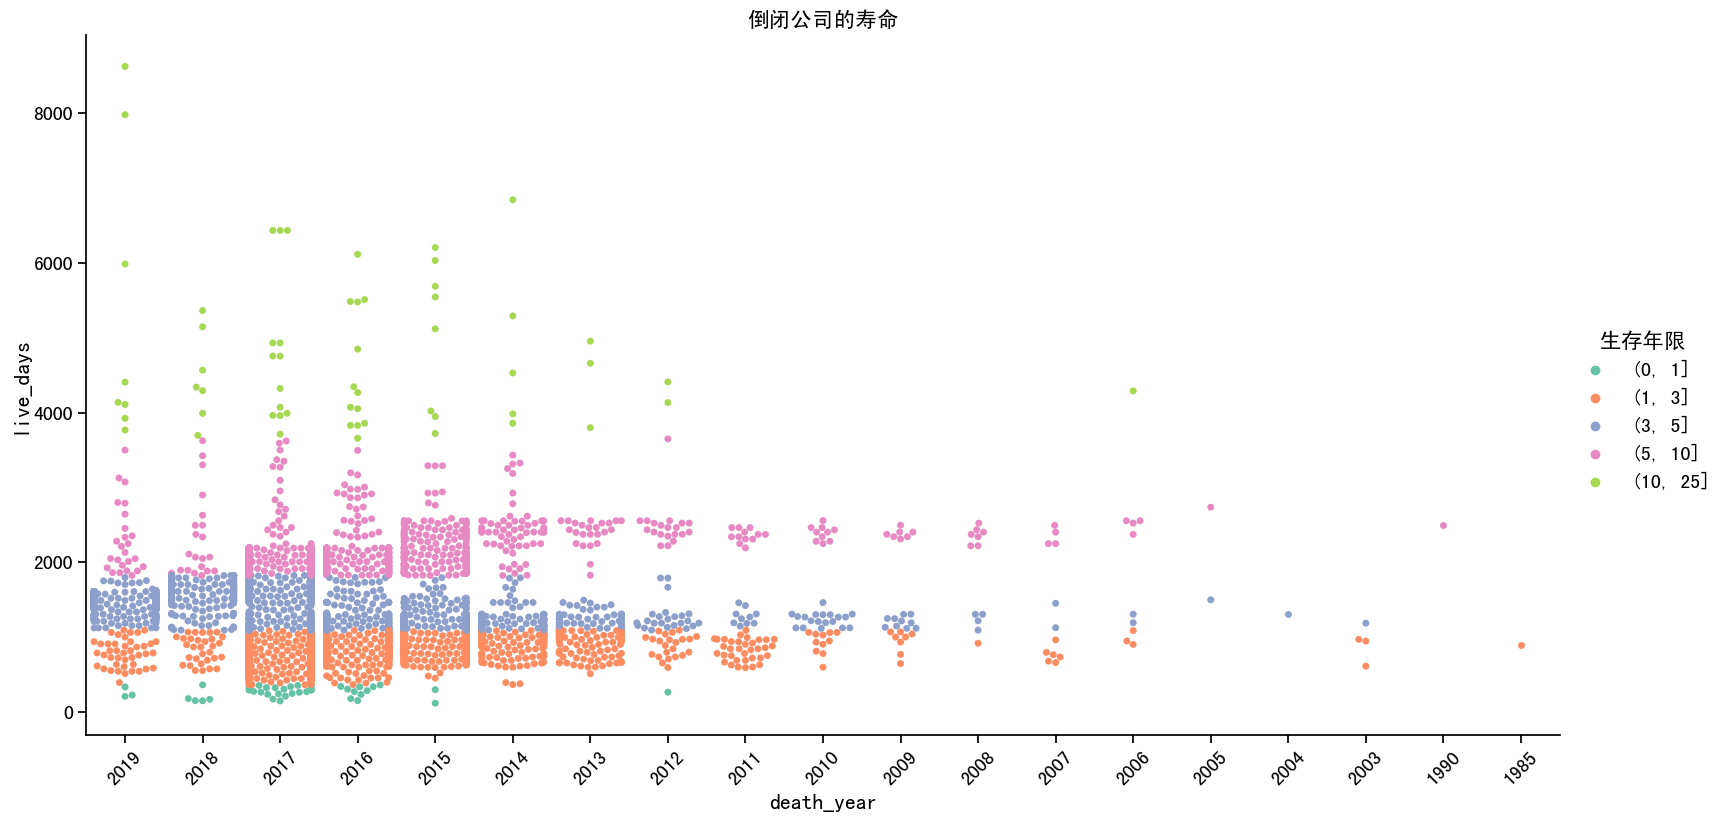

In [14]:
#分析倒闭公司的寿命
data['live_years'] = data['live_days']/365
data['生存年限'] =  pd.cut(x=data['live_years'],bins=[0,1,3,5,10,25])

sns.set_context("notebook",font_scale=1.3)
sns.catplot(x='death_year',y='live_days',hue='生存年限',kind='swarm',data=data,height=8,aspect=2,palette='Set2')
plt.title("倒闭公司的寿命")
plt.xticks(rotation=45)

plt.show()

### 3.3 公司倒闭的主要原因

In [15]:
from pyecharts.charts import Bar
from pyecharts import options as opts

# 获取倒闭原因的统计数据并按照词频排序
death_reason = {}
for row in data['death_reason'].values:
    if not pd.isnull(row):
        for name in row.split(' '):
            death_reason[name] = death_reason.get(name, 0) + 1

sorted_reason = sorted(death_reason.items(), key=lambda x: x[1], reverse=True)  # 按照词频从高到低排序

# 创建 Bar 图表
bar = (
    Bar()
    .add_xaxis([item[0] for item in sorted_reason])  # x轴为倒闭原因
    .add_yaxis("", [item[1] for item in sorted_reason], color='SkyBlue')  # y轴为词频
    .set_global_opts(title_opts=opts.TitleOpts(title="公司倒闭的主要原因"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)),
                     yaxis_opts=opts.AxisOpts(name="", axislabel_opts=opts.LabelOpts(formatter="{value}")))  # 设置图表标题、x轴标签旋转角度、y轴名称、网格线
)

# 渲染图表
bar.render_notebook()


从图中可以看出，较多公司的倒闭原因是商业模式匮乏，行业竞争，市场伪需求，业务调整等因素。

In [16]:
#倒闭原因词云
death_reason = {}
for row in data['death_reason'].values:
    if not pd.isnull(row):
        for name in row.split(' '):
            death_reason[name] = death_reason.get(name, 0) + 1
c = (
    WordCloud()
    .add("", [*death_reason.items()], word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="倒闭原因词云"))
)
c.render_notebook()

### 3.4 倒闭公司的行业分布

In [17]:
s = data.groupby('cat').size().sort_values(ascending=False)[:10].to_dict()

c = (
    Bar()
    .add_xaxis(list(s.keys()))
    .add_yaxis("死亡企业数量", list(s.values()))
    .set_global_opts(title_opts=opts.TitleOpts(title="行业排行TOP10"))
)
c.render_notebook()

倒闭公司的行业分布前top5为电子商务,企业服务,本地生活,金融,社交网络。下图是2014-2017年前top5细分领域倒闭情况

In [18]:
data1 = data[data['death_year'].isin(['2014','2015','2016','2017'])]
page = Page()
for x in ['电子商务','企业服务','本地生活','金融','社交网络']:
    data2 = data1[data1['cat']==x]
    s = data2.groupby('se_cat').size().sort_values(ascending=False)[:10].sort_values(ascending=True).to_dict()
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(list(s.keys()))
    .add_yaxis("死亡企业数量", list(s.values()))
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="{} 2014-2017年细分领域倒闭情况".format(x)))
    )
    page.add(c)
page.render_notebook()


### 3.5 公司融资情况的统计

In [19]:
financing = {}
for row in data['financing'].values:
    if not pd.isnull(row):
        for name in row.split(' '):
            financing[name] = financing.get(name, 0) + 1
c = (
    WordCloud()
    .add("", [*financing.items()], word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="融资情况词云"))
)
c.render_notebook()

In [20]:
# 频数统计
financing_counts = data['financing'].value_counts()

# 创建 Bar 图表
bar = (
    Bar()
    .add_xaxis(financing_counts.index.tolist())  # x轴为融资情况
    .add_yaxis("", financing_counts.values.tolist())  # y轴为频数
    .set_global_opts(title_opts=opts.TitleOpts(title="融资情况"),
                     xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45)))  # 设置x轴标签旋转角度
)

# 渲染图表
bar.render_notebook()


根据提供的倒闭公司融资情况及数量数据，我们可以进行如下解读：

1. **尚未获投**（1798家）：这些公司可能是初创阶段的创业者，尚未获得任何外部资金支持，或者是自给自足型的企业。倒闭可能与缺乏资金支持和资源有关。

2. **天使轮**（528家）：这些公司已经通过天使投资者获得了初期的资金支持，通常用于启动业务、产品研发和市场推广等。倒闭可能与市场竞争激烈、商业模式不成熟等因素有关。

3. **A轮、B轮、C轮、D轮、E轮**：这些轮次代表了不同阶段的融资，随着轮次的增加，公司规模和估值通常会增加，但同时也意味着公司需要承担更高的市场期望和竞争压力。倒闭可能与管理团队能力不足、资金链断裂、市场变化等因素有关。

4. **已被收购、已上市、新三板**：这些情况表示公司已经通过被收购、上市或在新三板挂牌等方式退出了市场。倒闭可能与商业模式不成熟、经营策略失误、市场竞争等因素有关。

5. **种子轮、Pre-A轮、A+轮、B+轮、战略投资**：这些融资阶段通常处于初创公司的早期或者后期阶段，各具特点，倒闭可能与资金管理不善、市场表现不佳、竞争对手的崛起等因素有关。

倒闭公司的融资情况反映了其发展历程和资金支持情况，倒闭的原因可能与多种因素相互作用，包括但不限于市场环境、竞争压力、经营策略、管理团队能力等。

In [21]:
invest = {}
for row in data['invest_name'].values:
    if not pd.isnull(row):
        for name in row.split('&'):
            invest[name] = invest.get(name, 0) + 1
invest = [*invest.items()]
invest.sort(key=lambda x: x[1], reverse=True)
c = (
    WordCloud()
    .add("", invest[:150], word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="投资方词云"))
)
c.render_notebook()

In [22]:
# 定义资金区间
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['<1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k-9k', '9k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '>100k']

# 将数据分组
data['investment_range'] = pd.cut(data['total_money'], bins=bins, labels=labels, right=False)

# 统计不同资金区间的公司数量
investment_counts = data['investment_range'].value_counts().sort_index()

# 创建柱状图对象
bar = (
    Bar()
    .add_xaxis(investment_counts.index.tolist())
    .add_yaxis("公司数量", investment_counts.values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="不同资金区间的公司数量统计"),
                     xaxis_opts=opts.AxisOpts(name="资金",axislabel_opts=opts.LabelOpts(rotate=45)),
                     yaxis_opts=opts.AxisOpts())
)

# 渲染图表
bar.render_notebook()


根据不同资金区间的公司数量统计，我们可以得到以下一些分析：

1. **资金分布情况**：大部分公司的融资金额都集中在 1k 到 10k 之间，特别是在 1k 到 5k 区间内，公司数量较多。而随着融资金额的增加，公司数量逐渐减少。

2. **较高资金区间的公司数量较少**：在 10k 以上的区间，尤其是超过 50k 的区间，公司数量明显减少，表明融资金额较高的公司相对较少。

3. **分布不均匀**：在一些较高的区间，比如 60k 到 80k，甚至 90k 到 100k，公司数量非常少甚至没有，这表明这些融资金额区间内的公司相对较稀少。

4. **可能的趋势**：尽管统计数量有限，但仍然可以观察到一些趋势，比如随着融资金额的增加，公司数量呈现逐渐减少的趋势，这可能反映了高额融资在市场上的稀缺性和竞争性。

## 4.结论
1）.经济发达地区的竞争极为激烈，虽然经济领先机遇较多，但是其中的挑战也是巨大的，创业公司需谨慎选择；  
2）.近年来，电子商务行业的兴起引发了一波企业进军互联网的浪潮，从而也造就了一个遍地竞争的环境；  
3）.倒闭企业大多都是未获得投资的企业，一个企业的繁荣兴起是需要强大的金钱资本的，对于那些活跃在发达地区，新兴产业的公司更是；  
4）.经过资料查询，2017年间，国家出台了一系列关于借贷的政策，与金融行业中的借贷公司的大量淘汰或有关系。  